In [1]:
include("./Functions.jl")


Main.GPLM

In [2]:
using Pkg
Pkg.add("Plots")
using PackageCompiler
compile_package("Plots",force=true)

   Updating registry at `/opt/julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %        ]  76.9 %Fetching: [================================>        ]  79.5 %

  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]


ArgumentError: ArgumentError: Package PackageCompiler not found in current path:
- Run `import Pkg; Pkg.add("PackageCompiler")` to install the PackageCompiler package.


In [3]:
using .GPLM


In [4]:
using Random


In [5]:
using Plots

In [6]:
using LinearAlgebra


In [7]:
Pkg.add("Distributions")
using Distributions

  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]


In [8]:
gr()

Plots.GRBackend()

In [16]:
k(x,x_)=(x[1]x_[1]+x[2]x_[2]+1)^2

k (generic function with 1 method)

In [17]:
Φ(x)=[x[1]^2 x[2]^2 (x[1] * x[2])*√2 x[1]*√2 x[2]*√2 1]

Φ (generic function with 1 method)

In [18]:
f(x)=[sin(x[1]) cos(x[2])]

f (generic function with 1 method)

In [19]:
n(x)=[0.1 0.05]
X,Y=GPLM.ToyData(f,2,2,min=0,max=π,messiness=n, N=100)

([0.2741875288540387 0.04110816535195784; 0.7119498147417699 0.17908539882254484; … ; 0.9371321558008319 2.1038952409345946; 3.1340248375411623 0.6048330313255609], [0.1452729775366576 0.9966227270384915; 0.8008165408404022 0.9668191369758182; … ; 0.8556667459146475 -0.519042676242837; -0.12589641898478535 0.8317885953540178])

In [20]:
Y[1,:]

2-element Array{Float64,1}:
 0.1452729775366576
 0.9966227270384915

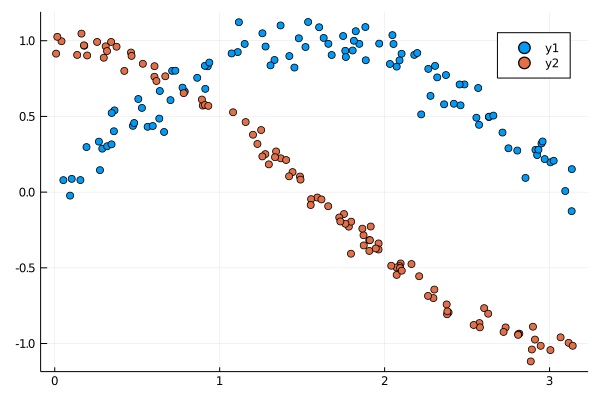

In [21]:
plot(X[:,1],Y[:,1],seriestype=:scatter)
plot!(X[:,2],Y[:,2],seriestype=:scatter)

In [22]:
K=zeros(size(Y,1),size(Y,1))
for i in 1:size(Y,1)
    for j in 1:i
        K[i,j]=K[j,i]
    end
    for j in i:size(Y,1)
        K[i,j]=(Φ(Y[i,:])Φ(Y[j,:])')[1]
    end
end

In [23]:
K

100×100 Array{Float64,2}:
 4.05765     4.32595    1.92033  0.12971   …  0.33645   0.368468  3.2786
 4.32595     6.63601    4.47648  0.411496     0.784911  1.40046   2.90147
 1.92033     4.47648    5.34835  1.66469      1.93491   3.40649   1.09042
 0.12971     0.411496   1.66469  2.71516      2.30106   2.90115   0.135264
 0.0238975   0.1326     1.24396  3.00391      2.4222    2.89124   0.0508046
 0.143471    1.09136    3.7298   3.71002   …  3.27123   5.00478   0.0571602
 0.00314778  0.0579763  1.4451   3.77319      2.96672   3.70353   0.000368809
 3.6873      4.21944    2.16993  0.226445     0.458545  0.560328  2.91583
 0.954233    2.33394    3.62752  2.05233      2.07654   3.19891   0.60004
 0.115255    0.91571    3.38697  3.67167      3.20067   4.78527   0.0505756
 0.00259769  0.0760108  1.23674  3.29457   …  2.61251   3.13778   0.0180613
 4.08004     5.17168    2.88762  0.249169     0.525401  0.758061  3.0436
 0.120867    1.07987    3.86161  3.86777      3.39704   5.2357    0.0415637

In [24]:
K_=zeros(size(Y,1),size(Y,1))
for i in 1:size(Y,1)
    for j in 1:size(Y,1)
        K_[i,j]=k(Y[i,:],Y[j,:])
    end
end

In [25]:
K_

100×100 Array{Float64,2}:
 4.05765     4.32595    1.92033  0.12971   …  0.33645   0.368468  3.2786
 4.32595     6.63601    4.47648  0.411496     0.784911  1.40046   2.90147
 1.92033     4.47648    5.34835  1.66469      1.93491   3.40649   1.09042
 0.12971     0.411496   1.66469  2.71516      2.30106   2.90115   0.135264
 0.0238975   0.1326     1.24396  3.00391      2.4222    2.89124   0.0508046
 0.143471    1.09136    3.7298   3.71002   …  3.27123   5.00478   0.0571602
 0.00314778  0.0579763  1.4451   3.77319      2.96672   3.70353   0.000368809
 3.6873      4.21944    2.16993  0.226445     0.458545  0.560328  2.91583
 0.954233    2.33394    3.62752  2.05233      2.07654   3.19891   0.60004
 0.115255    0.91571    3.38697  3.67167      3.20067   4.78527   0.0505756
 0.00259769  0.0760108  1.23674  3.29457   …  2.61251   3.13778   0.0180613
 4.08004     5.17168    2.88762  0.249169     0.525401  0.758061  3.0436
 0.120867    1.07987    3.86161  3.86777      3.39704   5.2357    0.0415637

In [26]:
G(x,x_,θ1,θ2)=θ1*exp(-(x-x_)*(x-x_)'/θ2)

G (generic function with 1 method)

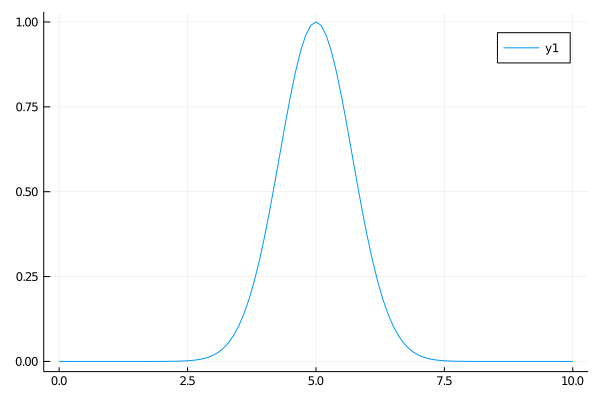

In [27]:
x=[i for i in 0:0.1:10]
x_=5
θ1=1
θ2=1
y=[G(i,x_,θ1,θ2) for i in x]
plot(x,y)

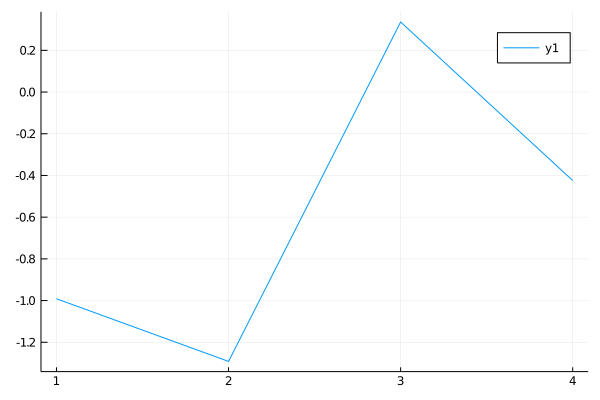

In [28]:
G(x,x_)=GPLM.GaussianKernel(x,x_,th1=1,th2=1)
x=[i for i in 1:1:4]
K=GPLM.KernelMatrix(x,G)
y=cholesky(K).L*randn(length(x))
plot(x,y)

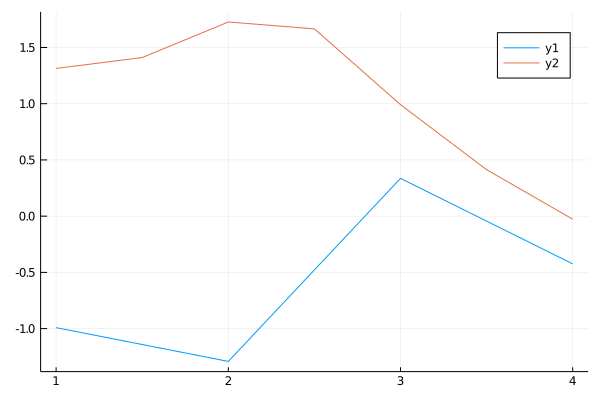

In [29]:
x=[i for i in 1:0.5:4]
K=GPLM.KernelMatrix(x,G)
y=cholesky(K).L*randn(length(x))
plot!(x,y)

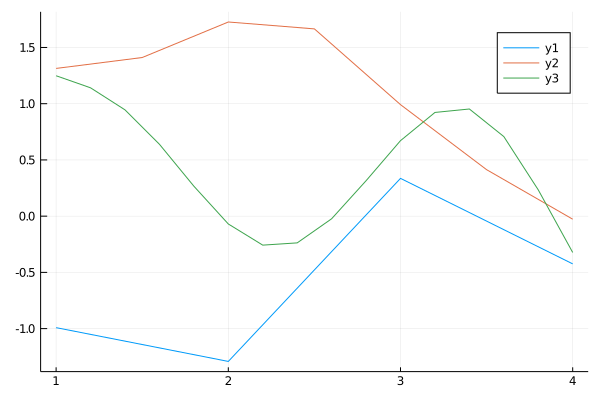

In [30]:
x=[i for i in 1:0.2:4]
K=GPLM.KernelMatrix(x,G)
y=cholesky(K).L*randn(length(x))
plot!(x,y)

In [31]:
X=vcat([[i i] for i in 1:0.2:4]...)
K=GPLM.KernelMatrix(X,G)


16×16 Array{Float64,2}:
 1.0       0.961558  0.863075  0.743376  …  0.500001  0.5       0.5
 0.961558  1.0       0.961558  0.863075     0.500005  0.500001  0.5
 0.863075  0.961558  1.0       0.961558     0.500031  0.500005  0.500001
 0.743376  0.863075  0.961558  1.0          0.500168  0.500031  0.500005
 0.639019  0.743376  0.863075  0.961558     0.500767  0.500168  0.500031
 0.567668  0.639019  0.743376  0.863075  …  0.502988  0.500767  0.500168
 0.528067  0.567668  0.639019  0.743376     0.509921  0.502988  0.500767
 0.509921  0.528067  0.567668  0.639019     0.528067  0.509921  0.502988
 0.502988  0.509921  0.528067  0.567668     0.567668  0.528067  0.509921
 0.500767  0.502988  0.509921  0.528067     0.639019  0.567668  0.528067
 0.500168  0.500767  0.502988  0.509921  …  0.743376  0.639019  0.567668
 0.500031  0.500168  0.500767  0.502988     0.863075  0.743376  0.639019
 0.500005  0.500031  0.500168  0.500767     0.961558  0.863075  0.743376
 0.500001  0.500005  0.500031  0.5001

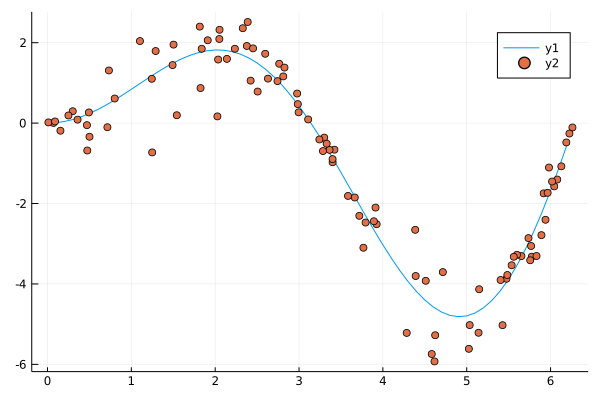

In [32]:
f(x)=x[1]*sin(x[1])
x=[i for i in 0:0.1:2π]
y=[f(i) for i in x]
n(x)=[sin(x[1])]
plot(x,y)
X,Y=GPLM.ToyData(f,1,1,min=0,max=2π,messiness=n,N=100)
plot!(X,Y,seriestype=:scatter)

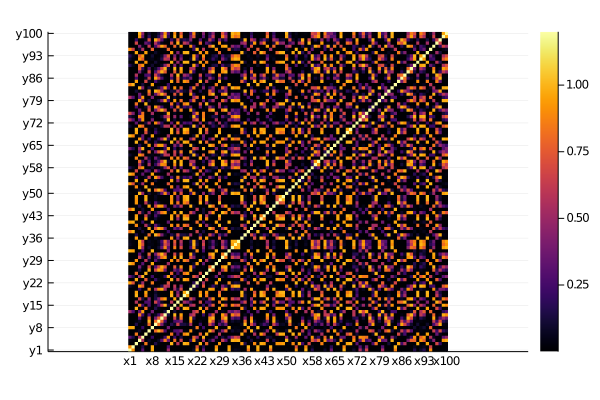

In [33]:
k(x,x_,)=GPLM.GaussianKernel(x,x_,;th1=1,th2=1)
K=GPLM.KernelMatrix(X,k,observationn_noise=0.2)
# heatmap(K)
xs = [string("x", i) for i = 1:100]
ys = [string("y", i) for i = 1:100]
heatmap(xs, ys, K, aspect_ratio=1)

In [34]:
yy=inv(K)*Y

100-element Array{Float64,1}:
 -0.8302707059573499
 -0.6978723402992796
 -2.6559464038177145
  3.0365891881755154
 -5.606231850739849
  1.3855402471705927
  3.1490661624516787
  1.4908141535505688
  7.664750127901023
  1.3043899290813221
  1.610847115667524
 -0.8480389320376345
  3.5913108327530274
  ⋮
  1.8474371984444629
  1.3607536990845028
 -2.7967845650032888
  2.997937378384886
  4.2079462975924455
  0.6095510102347581
  0.5922385892818366
 -0.4013724769125218
  3.4722985884851916
  2.824622804445756
  1.143484119894815
 -3.215995280499371

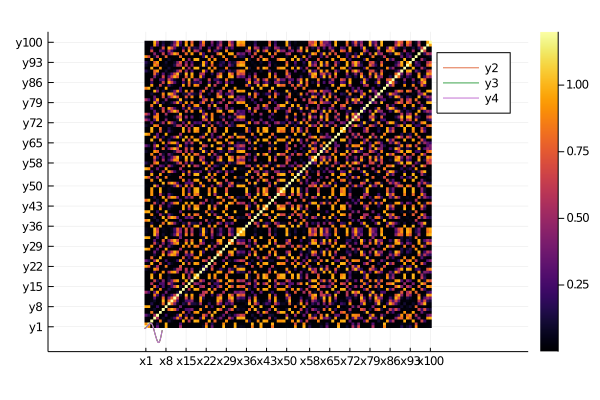

In [35]:
μ=[]
σ=[]
for i in 0:0.1:2π
    k_=[k(j,i) for j in X]
    s=k(i,i)
    mu=(k_'*yy)[1]
    var=s-(k_'*inv(K)*k_)[1]
    push!(μ,mu)
    push!(σ,var)
end
plot!(0:0.1:2π,μ)
plot!(0:0.1:2π,μ+σ)
plot!(0:0.1:2π,μ-σ)

In [36]:
σ

63-element Array{Any,1}:
 0.051674510408602714
 0.03215087145895601
 0.022507740902139473
 0.01908950352726191
 0.019095460785213292
 0.02075803297427481
 0.023106466638886602
 0.02557397681146023
 0.0277081587216772
 0.02910636587407267
 0.029520507362786996
 0.02897259608156244
 0.02774649679181529
 ⋮
 0.024905619536147006
 0.022876690051387816
 0.020241195911570697
 0.017571235667415808
 0.015334842511228963
 0.013724636655756184
 0.012647831751137484
 0.011925987881654887
 0.011684082142874086
 0.012818933257172316
 0.01735719966556859
 0.028491962162080386

In [37]:
(μ,σ,K,K_,yy)=GPLM.GaussianProcessRegression(X,Y,k,x_test=[i for i in 0:0.1:2π],observationn_noise=0.01)

(Any[0.10175102163296401, -0.014467693827867834, -0.08163271613578615, -0.08840462664691984, -0.03208033862871673, 0.08077869477254751, 0.2355710975388874, 0.41255421905279377, 0.5908161689066844, 0.7524270660476873  …  -4.503321803676755, -4.230590199523306, -3.9274659042211795, -3.591494238693997, -3.214425663475282, -2.7856123542875935, -2.2964619753282705, -1.7447853888854183, -1.1379149863882532, -0.49379752209893013], Any[0.00445764761639178, 0.001898028048722633, 0.0014057516540789683, 0.0013852420574005375, 0.001333553477418148, 0.0013032619157921088, 0.0014399065334602668, 0.0017490405245765839, 0.0020901468562031233, 0.0022929401889441037  …  0.0013402694245242541, 0.0011539877491507644, 0.000991105771777745, 0.0008584040763305323, 0.0007791057818852254, 0.000769242712132634, 0.0008021418705833616, 0.0008352465276544319, 0.0009888106415240072, 0.0019083653392147903], [1.01 0.9049829524743881 … 0.010871198280277692 0.02209759026602711; 0.9049829524743881 1.01 … 0.0025663818772

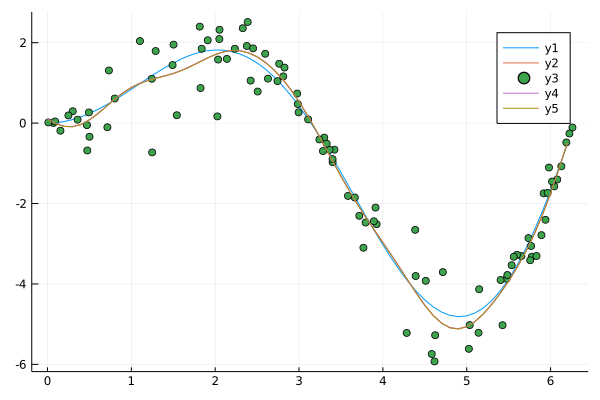

In [38]:
x_test=[i for i in 0:0.1:2π]
x=[i for i in 0:0.1:2π]
y=[f(i) for i in x]
plot(x,y)
plot!(x_test,μ)
plot!(X,Y,seriestype=:scatter)
plot!(x_test,μ+2 .*σ)
plot!(x_test,μ-2 .*σ)


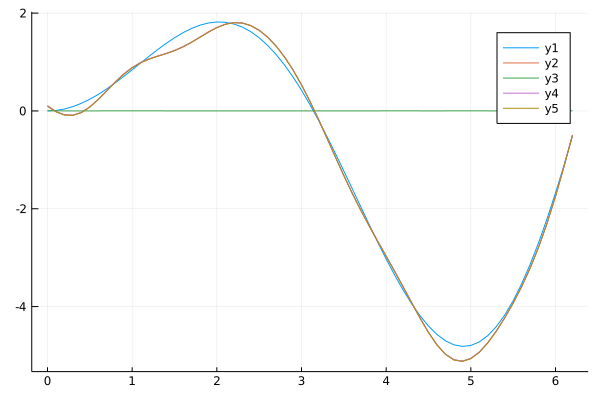

In [39]:
plot(x,y)
plot!(x_test,μ)
plot!(x_test,σ)
plot!(x_test,μ+2 .*σ)
plot!(x_test,μ-2 .*σ)